# Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv(r"C:\Users\SHIVA KUMAR\Downloads\Unemployment in India.csv").dropna()

In [3]:
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


# Data Preprocessing

In [4]:
data.isnull().sum().to_frame().rename(columns={0:"Total_No_of_Missing_values"})

,Total_No_of_Missing_values
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [5]:
data.duplicated().sum()

0

In [6]:
data.rename(columns={"Region":"Region"," Date":"Date"," Estimated Unemployment Rate (%)":"Estimated Unemployment Rate (%)",
                  " Estimated Employed":"Estimated Employed"," Estimated Labour Participation Rate (%)":
                   "Estimated Labour Participation Rate (%)"},inplace=True)

In [7]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [8]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.strftime('%B')

In [9]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,September


In [10]:
round(data.select_dtypes(include=["float","int"]).describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,11.8,10.7,0.0,4.7,8.4,15.9,76.7
Estimated Employed,740.0,7204460.0,8087988.4,49420.0,1190404.5,4744178.5,11275489.5,45777509.0
Estimated Labour Participation Rate (%),740.0,42.6,8.1,13.3,38.1,41.2,45.5,72.6
year,740.0,2019.4,0.5,2019.0,2019.0,2019.0,2020.0,2020.0


# Data Visualization through barplot

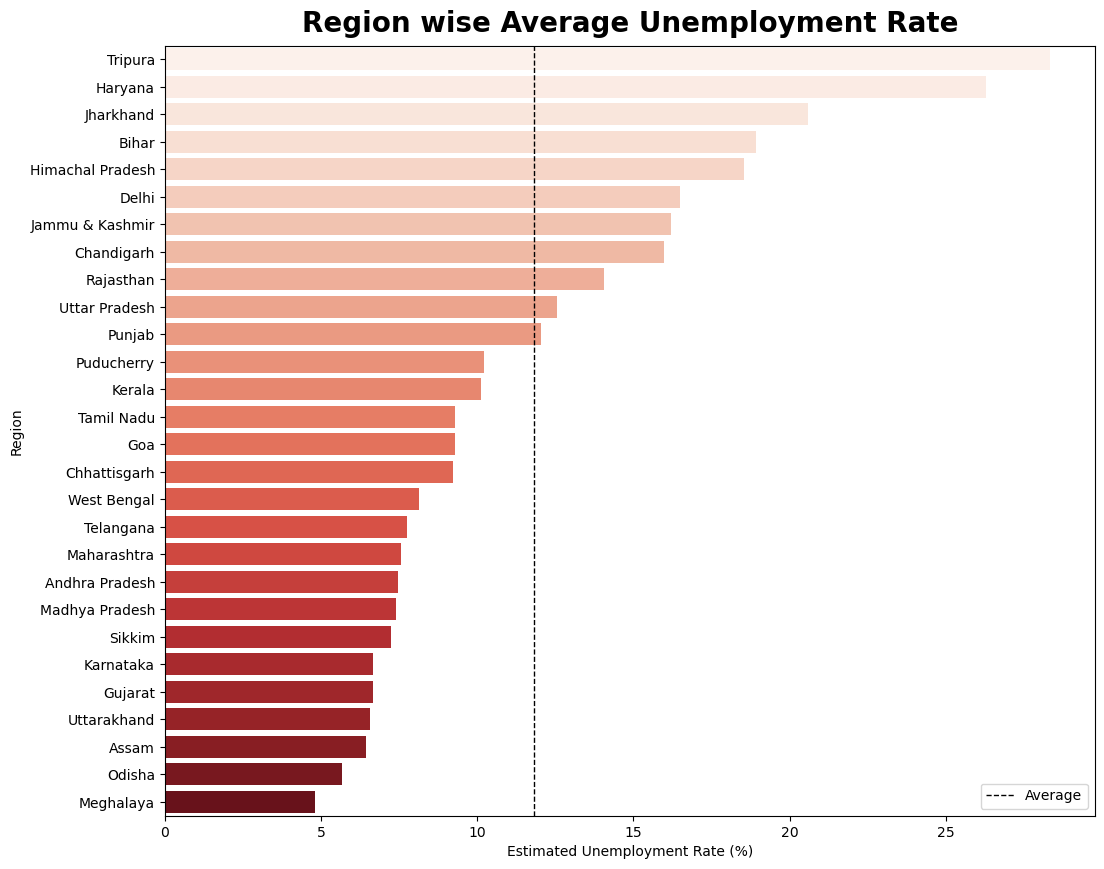

In [11]:
x = data.groupby(["Region"])["Estimated Unemployment Rate (%)"].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='mean', y=x.index, data=x, ci='std', palette='Reds')
plt.axvline(x['mean'].mean(), color='black', linestyle='dashed', linewidth=1, label='Average')
plt.legend()
plt.title("Region wise Average Unemployment Rate", fontweight="black", fontsize=20, pad=10)
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()

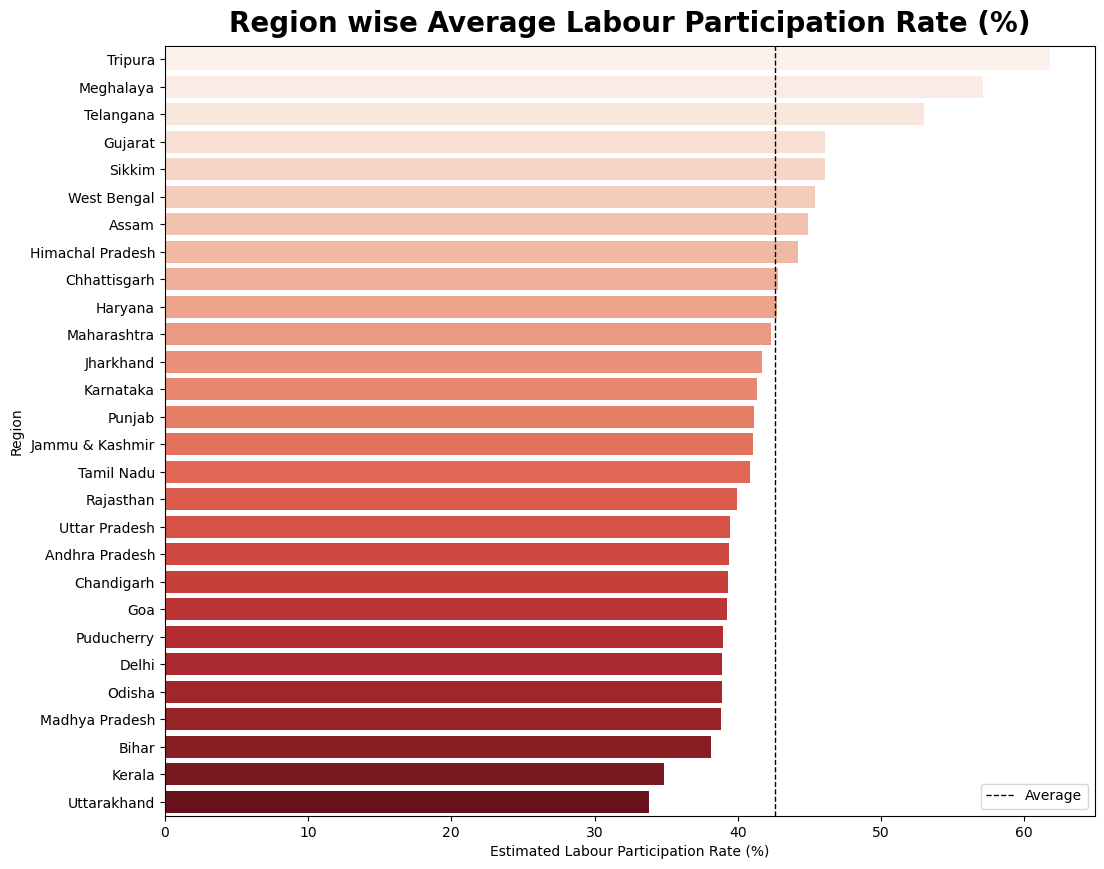

In [12]:
x = data.groupby(["Region"])["Estimated Labour Participation Rate (%)"].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='mean', y=x.index, data=x, ci='std', palette='Reds')
plt.axvline(x['mean'].mean(), color='black', linestyle='dashed', linewidth=1, label='Average')
plt.legend()
plt.title("Region wise Average Labour Participation Rate (%)", fontweight="black", fontsize=20, pad=10)
plt.xlabel("Estimated Labour Participation Rate (%)")
plt.ylabel("Region")
plt.show()

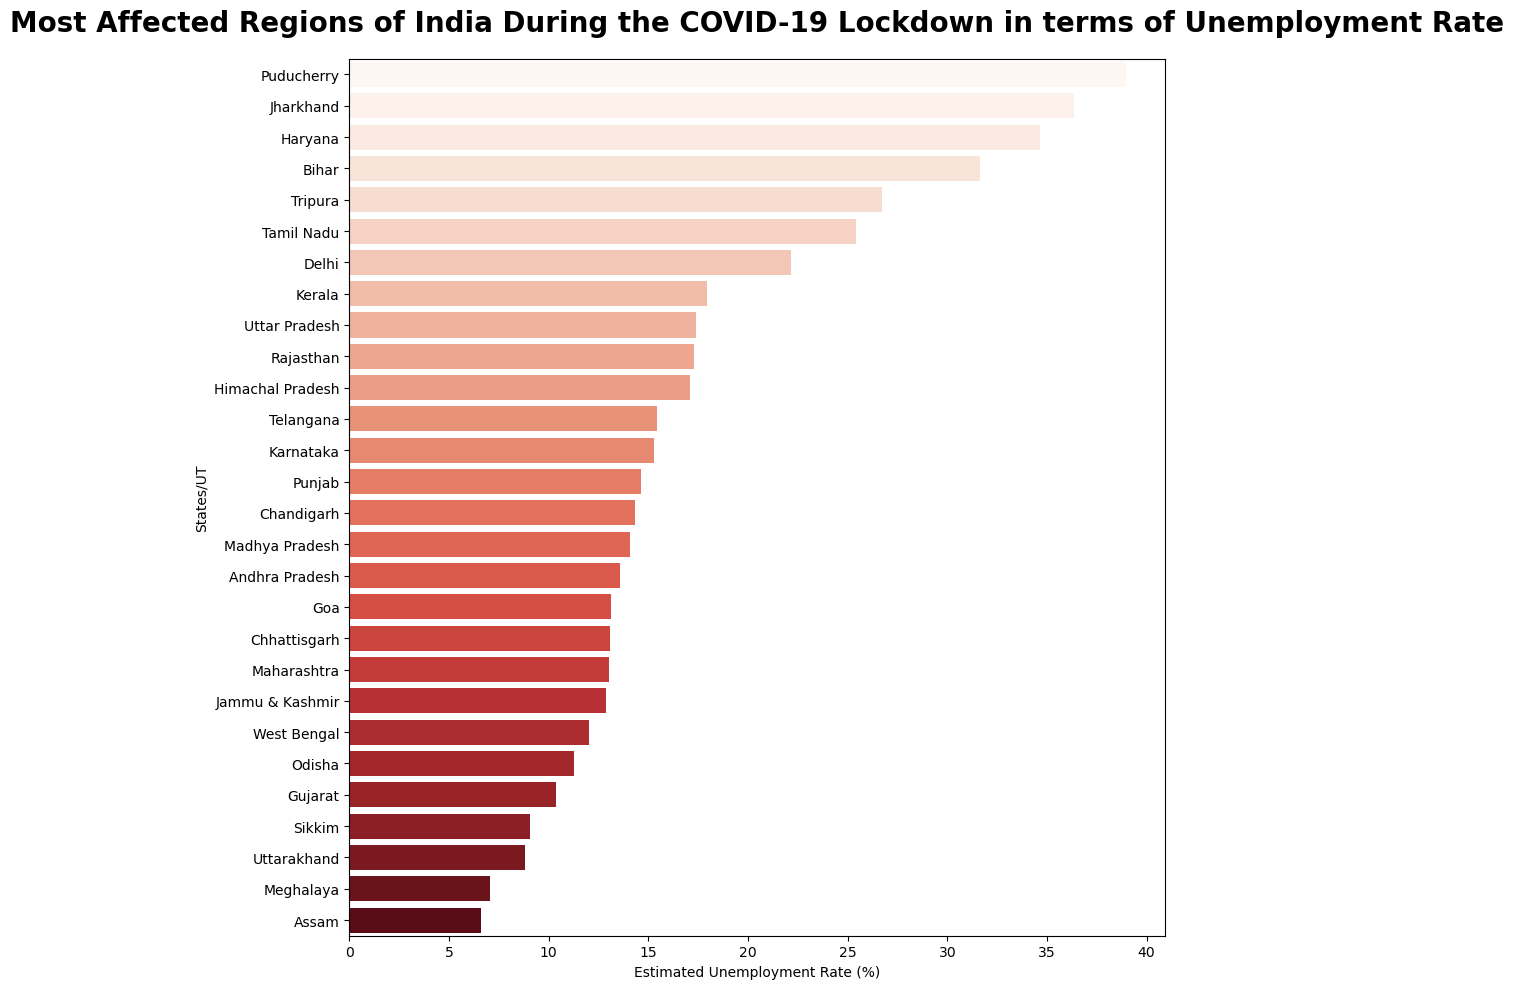

In [13]:
# Assuming 'df' is the DataFrame containing the data
x = data[(data["year"] == 2020) & ((data["Date"].dt.month) >= 3)]

# Calculate mean unemployment rate for each state
z = x.groupby(["Region"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()

# Create a custom color palette using a color map
cmap = plt.cm.get_cmap('Reds', len(z))
color_palette = [cmap(i) for i in range(len(z))]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 10))
sns.barplot(x="Estimated Unemployment Rate (%)", y=z.index, data=z, palette=color_palette)
plt.title("Most Affected Regions of India During the COVID-19 Lockdown in terms of Unemployment Rate",
          fontweight="bold", fontsize=20, pad=20)

plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("States/UT")

plt.tight_layout()
plt.show()

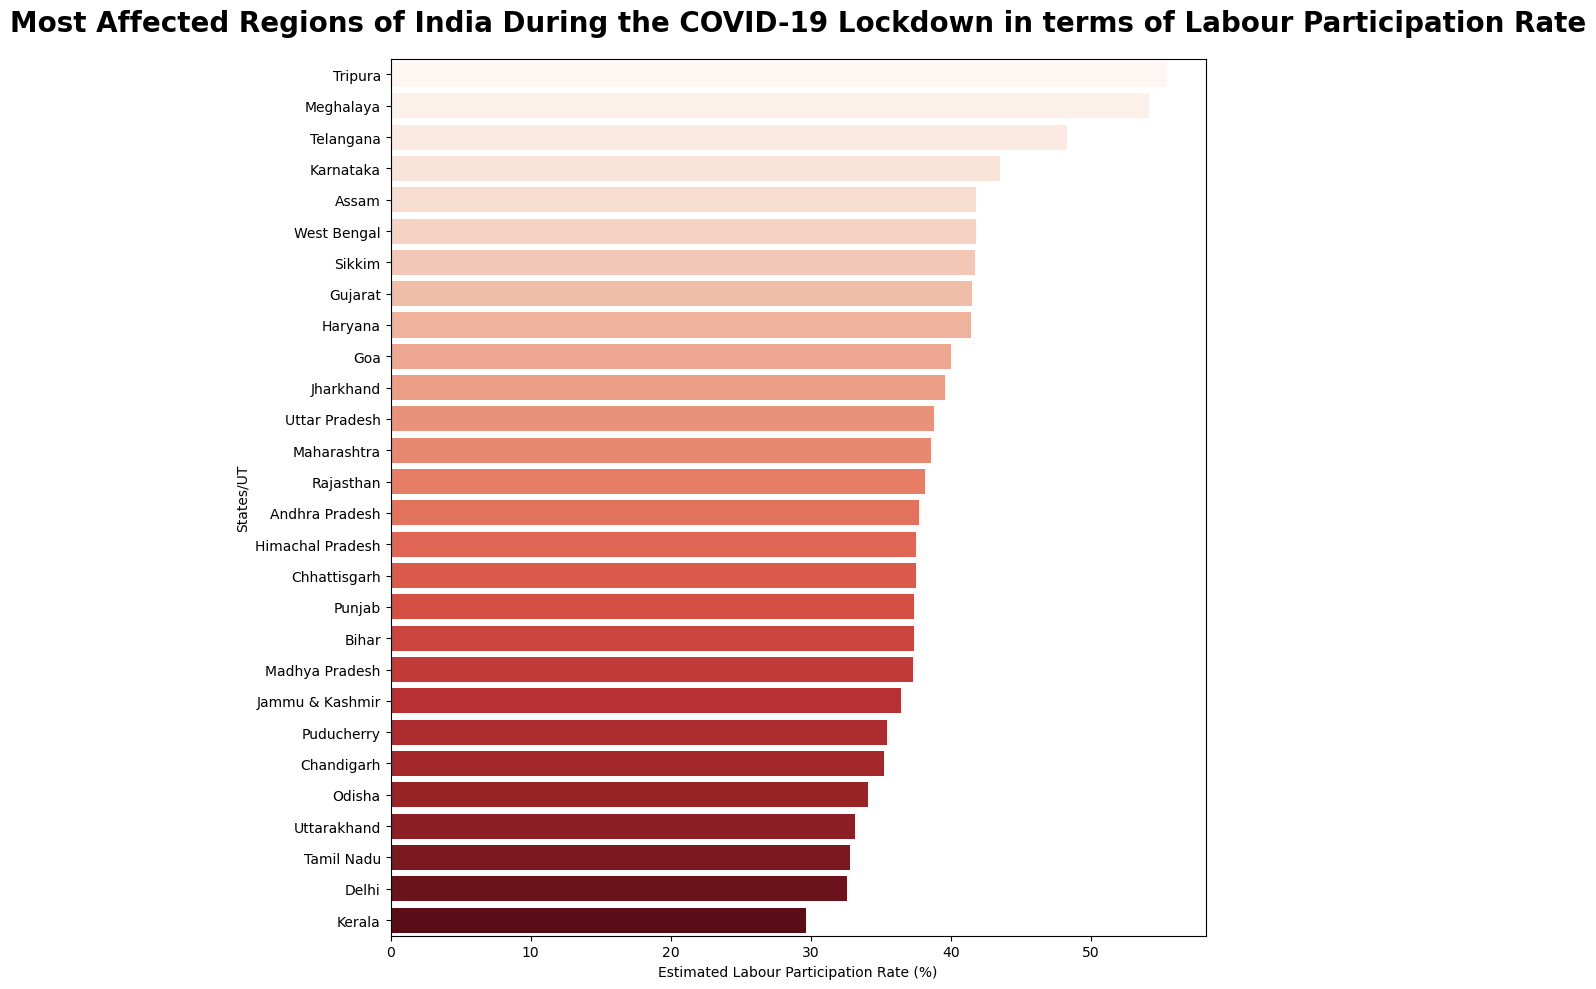

In [14]:
# Assuming 'df' is the DataFrame containing the data
x = data[(data["year"] == 2020) & ((data["Date"].dt.month) >= 3)]

# Calculate mean unemployment rate for each state
z = x.groupby(["Region"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()

# Create a custom color palette using a color map
cmap = plt.cm.get_cmap('Reds', len(z))
color_palette = [cmap(i) for i in range(len(z))]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 10))
sns.barplot(x="Estimated Labour Participation Rate (%)", y=z.index, data=z, palette=color_palette)
plt.title("Most Affected Regions of India During the COVID-19 Lockdown in terms of Labour Participation Rate",
          fontweight="bold", fontsize=20, pad=20)

plt.xlabel("Estimated Labour Participation Rate (%)")
plt.ylabel("States/UT")

plt.tight_layout()
plt.show()